In [2]:
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle
import pandas as pd
import seaborn as sb
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Load dataset
# df_fake = pd.read_csv("../data/fake.csv")  # Update path as needed

# df_fake.head(10)

[nltk_data] Downloading package stopwords to /home/vivi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/vivi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/vivi/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /home/vivi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "fake.csv"

# Load the latest version
df_fake = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "bhavikjikadara/fake-news-detection",
  file_path,
)

df_fake.head(10)

/tmp/ipykernel_54338/4166057717.py:8: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df_fake = kagglehub.load_dataset(


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [4]:
file_path = "true.csv"
# Load the latest version
df_real = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "bhavikjikadara/fake-news-detection",
  file_path,
)

/tmp/ipykernel_54338/1322080452.py:3: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df_real = kagglehub.load_dataset(


In [5]:
df_fake['Label'] = 'False'
df_real['Label'] = 'True'
df = pd.concat([df_fake,df_real])
df.head()

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",False
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",False
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",False
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",False
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",False


In [6]:
print(f'Data rows: {df.shape[0]}, Data columns: {df.shape[1]}')

Data rows: 44898, Data columns: 5


In [7]:
df.isna().sum()


title      0
text       0
subject    0
date       0
Label      0
dtype: int64

In [8]:
df.duplicated().sum()

209

In [9]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
print(f'Data rows after cleaning: {df.shape[0]}, Data columns after cleaning: {df.shape[1]}')

Data rows after cleaning: 44689, Data columns after cleaning: 5


In [10]:
def clean_text(text):
    # Converting all text to lowercase
    text = text.lower()
    
    # Delete link/URL
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text, flags=re.MULTILINE)
    
    # Delete emoji and characters non-ASCII
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    
    # Normalize Words
    text = re.sub(r"won\'t", "would not", text)
    text = re.sub(r"im", "i am", text)
    text = re.sub(r"Im", "i am", text)
    text = re.sub(r"dont", "do not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"don\'t", "do not", text)
    text = re.sub(r"shouldn\'t", "should not", text)
    text = re.sub(r"needn\'t", "need not", text)
    text = re.sub(r"hasn\'t", "has not", text)
    text = re.sub(r"haven\'t", "have not", text)
    text = re.sub(r"weren\'t", "were not", text)
    text = re.sub(r"mightn\'t", "might not", text)
    text = re.sub(r"didn\'t", "did not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    # Remove punctuation and other symbols
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    
    # Delete numbers
    text = re.sub(r'\d+', ' ', text)
    
    # Removing double spaces that may form
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text
df['text'] = df['text'].apply(clean_text)

# Example usage
sample_text = "Breaking News! Fake news spreads quickly on social media."
print(clean_text(sample_text))

breaking news fake news spreads quickly on social media


In [11]:
df.sample(5)

,title,text,subject,date,Label
8005,Federal judge limits some Election Day voter r...,chicago reuters a federal judge in illinois on...,politicsNews,"September 27, 2016",True
5628,U.S. and Russian ministries must restore direc...,moscow reuters one of russia s top diplomats s...,politicsNews,"February 6, 2017",True
9764,Ryan wants to end Obamacare cost protections f...,washington reuters u s house of representative...,politicsNews,"April 28, 2016",True
22371,Boiler Room EP #84 – The Discredited Media Str...,tune in to the alternate current radio network...,US_News,"November 16, 2016",False
8289,Watch The Hilarious GOP Debate Intro Fail (VI...,saturday s gop debate got off to a hilarious s...,News,"February 7, 2016",False


In [12]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = text.split()
    processed_words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(processed_words)

df['text'] = df['text'].apply(preprocess_text)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44689 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44689 non-null  object
 1   text     44689 non-null  object
 2   subject  44689 non-null  object
 3   date     44689 non-null  object
 4   Label    44689 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


In [14]:
df = df[['text', 'Label']]
df.head()

,text,Label
0,donald trump wish american happi new year leav...,False
1,hous intellig committe chairman devin nune go ...,False
2,friday reveal former milwauke sheriff david cl...,False
3,christma day donald trump announc would back w...,False
4,pope franci use annual christma day messag reb...,False


/tmp/ipykernel_54338/1844982484.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  return sb.countplot(x='Label', data=dataFile, palette='hls')


<Axes: xlabel='Label', ylabel='count'>

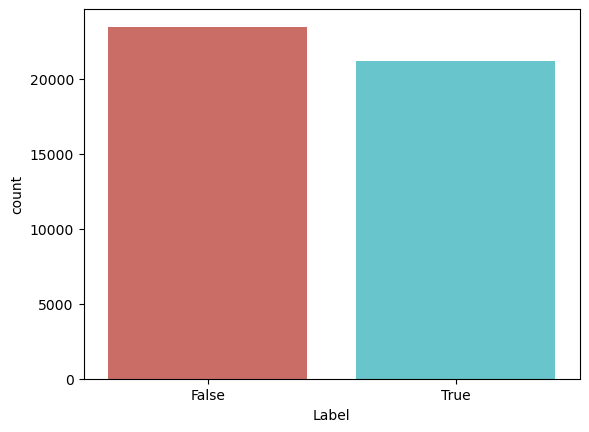

In [15]:
def create_distribution(dataFile):
    return sb.countplot(x='Label', data=dataFile, palette='hls')

# by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(df)

In [16]:
def data_qualityCheck():
    print("Checking data qualitites...")
    df.isnull().sum()
    df.info()  
    print("check finished.")
data_qualityCheck()

df = df.dropna()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
Index: 44689 entries, 0 to 21416
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44689 non-null  object
 1   Label   44689 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB
check finished.


In [17]:
print(df.columns)
df.shape
print(df.columns)

Index(['text', 'Label'], dtype='object')
Index(['text', 'Label'], dtype='object')


In [18]:
print(df.columns)
df.reset_index(drop= True,inplace=True)
df.head(10)

Index(['text', 'Label'], dtype='object')


,text,Label
0,donald trump wish american happi new year leav...,False
1,hous intellig committe chairman devin nune go ...,False
2,friday reveal former milwauke sheriff david cl...,False
3,christma day donald trump announc would back w...,False
4,pope franci use annual christma day messag reb...,False
5,number case cop brutal kill peopl color seem s...,False
6,donald trump spent good portion day golf club ...,False
7,wake yet anoth court decis derail donald trump...,False
8,mani peopl rais alarm regard fact donald trump...,False
9,might thought get break watch peopl kiss donal...,False


In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df.Label = label_encoder.fit_transform(df.Label)

In [20]:
Label_train = df.Label


In [21]:
Label_train.head(10)


0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Label, dtype: int64

In [22]:
Label_train.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Label, dtype: int64

In [23]:
df.drop('Label', axis=1, inplace=True)

In [24]:
df.head(10)

,text
0,donald trump wish american happi new year leav...
1,hous intellig committe chairman devin nune go ...
2,friday reveal former milwauke sheriff david cl...
3,christma day donald trump announc would back w...
4,pope franci use annual christma day messag reb...
5,number case cop brutal kill peopl color seem s...
6,donald trump spent good portion day golf club ...
7,wake yet anoth court decis derail donald trump...
8,mani peopl rais alarm regard fact donald trump...
9,might thought get break watch peopl kiss donal...


In [25]:
df['text'][2188]

'may ti ame mani year ago republican parti gave crap constitu day long gone seen enough proof yet watch snippet rep darrel issa town hall san diego california see mock constitu clai ame assault one issa staff woman said member california bar lawyer hold sign town hall taken away issa bodyguard said assault small sign said investig russia explain congressman stand stage mani peopl sign bodyguard secur guard came took sign away forcibl assert st amend right free speech told hi suppress speech sourc raw storyissa tri blame size sign appar overs sign ban event woman insist small apolog woman persist mine small forcibl taken constitut batteri woman assert staff commit cri amin offens point ryan enough woman said well okay grab mic said go somebodi pend lawsuit crowd thank boo video sadli seem common behavior among republican dissent longer welcom even attempt make protest illeg least difficult mani state michigan exampl lawmak tri pass law would make picket illeg charg fine day picket fortu

In [26]:
Label_train

0        0
1        0
2        0
3        0
4        0
        ..
44684    1
44685    1
44686    1
44687    1
44688    1
Name: Label, Length: 44689, dtype: int64

In [27]:
lemmatizer = WordNetLemmatizer()
stpwrds = list(stopwords.words('english'))

In [28]:
stpwrds

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [29]:
print(df.columns)

Index(['text'], dtype='object')


In [30]:
for x in range(len(df)) :
    corpus = []
    review = df['text'][x]
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))
    review = ' '.join(corpus)
    df.loc[x,'text'] = review

In [31]:
Label_train

0        0
1        0
2        0
3        0
4        0
        ..
44684    1
44685    1
44686    1
44687    1
44688    1
Name: Label, Length: 44689, dtype: int64

In [32]:
df['text'][2188]

'may ti ame mani year ago republican parti gave crap constitu day long gone seen enough proof yet watch snippet rep darrel issa town hall san diego california see mock constitu clai ame assault one issa staff woman said member california bar lawyer hold sign town hall taken away issa bodyguard said assault small sign said investig russia explain congressman stand stage mani peopl sign bodyguard secur guard came took sign away forcibl assert st amend right free speech told hi suppress speech sourc raw storyissa tri blame size sign appar over sign ban event woman insist small apolog woman persist mine small forcibl taken constitut batteri woman assert staff commit cri amin offens point ryan enough woman said well okay grab mic said go somebodi pend lawsuit crowd thank boo video sadli seem common behavior among republican dissent longer welcom even attempt make protest illeg least difficult mani state michigan exampl lawmak tri pas law would make picket illeg charg fine day picket fortun 

In [33]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['text'], Label_train, test_size=0.3, random_state=42)

In [34]:
Label_train

0        0
1        0
2        0
3        0
4        0
        ..
44684    1
44685    1
44686    1
44687    1
44688    1
Name: Label, Length: 44689, dtype: int64

In [35]:
X_train.shape, y_train.shape

((31282,), (31282,))

In [36]:
X_train

28999    washington reuter u presid donald trump use sw...
12753    funni guy sure everi woman campaign plane viol...
34585    washington reuter u suprem court challeng pres...
19345    ye mainstream fake news medium clear connect v...
25075    san francisco reuter facebook inc fb thursday ...
                               ...                        
6265     miss univers alicia machado american citizen v...
11284                                                     
38158    manila reuter leader across asia join u presid...
860      jesu f cking christ presid moron satisfi si am...
15795    mayb peopl posit author would speak entitl men...
Name: text, Length: 31282, dtype: object

In [37]:
y_train

28999    1
12753    0
34585    1
19345    0
25075    1
        ..
6265     0
11284    0
38158    1
860      0
15795    0
Name: Label, Length: 31282, dtype: int64

In [38]:
X_test

17893    school librarian cambridg massachusett reject ...
39482    nairobi reuter kenyan opposit leader raila odi...
36273    cairo reuter egypt reject u decis move embassi...
21761    recent speech given minist loui farrakhan took...
7557     tension ran high outsid campaign ralli donald ...
                               ...                        
26516    reuter u republican senat dean heller said fri...
25013    reuter u drug enforc administr act director tu...
41835    almati reuter kyrgyzstan talk moscow host seco...
43540    reuter british lawmak vote tuesday favor hand ...
2521     trump busi clai ame real news stori leak come ...
Name: text, Length: 13407, dtype: object

In [39]:
# Preprocessing
vectorizer = TfidfVectorizer(stop_words='english',max_features=5000)
vec_X_train = vectorizer.fit_transform(X_train)
vec_X_test = vectorizer.transform(X_test)

# Save the trained vectorizer
with open("../models/tfidf_vectorizer2.pkl", "wb") as file:
    pickle.dump(vectorizer, file)

In [40]:
vec_X_train.shape, vec_X_test.shape

((31282, 5000), (13407, 5000))

In [41]:
import itertools

import numpy as np


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier

# Train Models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(), #max_iter=1000
    "Random Forest": RandomForestClassifier(random_state = 0), #n_estimators=100
    "Decision Tree": DecisionTreeClassifier(),
    "PassiveAggressive" : PassiveAggressiveClassifier(),
    # "SGD" : SGDClassifier(),
    "GradientBoosting" : GradientBoostingClassifier(random_state = 0),
    # "SVM": SVC(),
    # "SVM2" : SVC(probability=True, kernel='rbf'),
}

In [43]:
import numpy as np
from sklearn import metrics

accuracies = {}
for name, model in models.items():
    model.fit(vec_X_train, y_train)
    y_pred = model.predict(vec_X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f'{name} Accuracy: {round(acc*100,2)}%')
    
    # Save model
    with open(f"../models/{name.replace(' ', '_').lower()}.pkl", "wb") as f:
        pickle.dump(model, f)

Naive Bayes Accuracy: 92.71%
Logistic Regression Accuracy: 98.61%
Random Forest Accuracy: 99.66%
Decision Tree Accuracy: 99.44%
PassiveAggressive Accuracy: 99.19%


KeyboardInterrupt: 

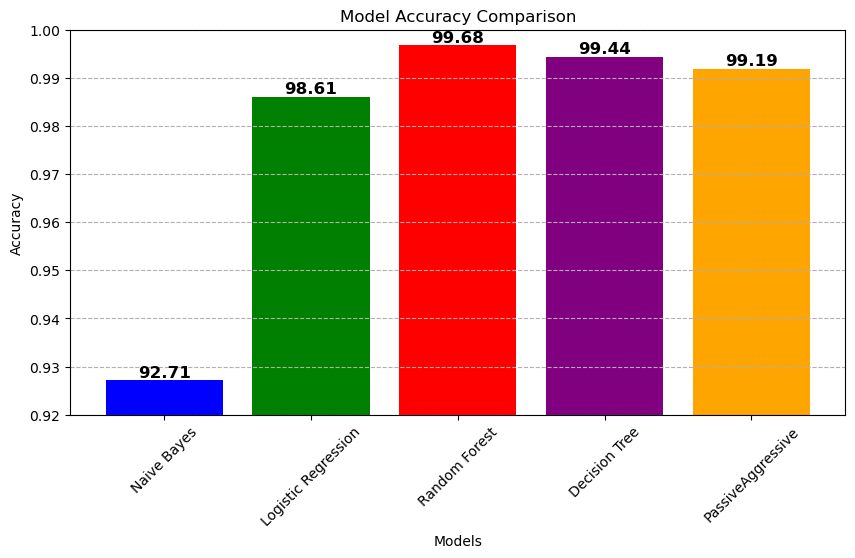

In [ ]:
# Plot improved accuracy comparison graph
plt.figure(figsize=(10,5))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'purple', 'orange'])

# Adding value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{round(yval*100,2)}", ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.ylim(0.92, 1)  # Accuracy y-axis ranges from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=1)

plt.show()
